In [9]:
import os
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from mne.io import read_epochs_eeglab
from mne import read_events
import scipy
from lagged_coherence import *

In [10]:
base_path = '/home/common/bonaiuto/dev_beta_umd/data'

ages=['9m','12m','adult']
pipeline='NEARICA_behav'
c_cluster_chans=['E16', 'E20', 'E21', 'E22','E41', 'E49', 'E50', 'E51']
n_chans=8

In [4]:
obs_epo = [1,2,3,4,5]
exe_epo = [6,7,8,9,10]


In [ ]:
for age in ages:
    
    # Your existing code
    for subj_id in os.listdir(op.join('/home/szhang/dev_beta_umd/data', age, 'derivatives', 'NEARICA_behav')):
        subject_data_fname=op.join('/home/common/bonaiuto/dev_beta_umd/data', age,'derivatives', pipeline, 
                           subj_id, 'processed_data', '{}_task-tool_obs_exe_eeg_processed_data.set'.format(subj_id))
        if op.exists(subject_data_fname):
            EEG = read_epochs_eeglab(subject_data_fname)
            srate = EEG.info['sfreq']
            event_id = EEG.event_id

            data = EEG.get_data()
            n_epochs = data.shape[0]
            n_chans = data.shape[1]
            n_samps = data.shape[2]

            freqs = np.arange(4, 100, 0.5)
            lags=np.arange(0.1,4.5,.05)
            
            out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'derivatives', 'NEARICA_behav', subj_id)
            os.makedirs(out_path, exist_ok=True)

            for epo in obs_epo:
                # Compute obs_epochs before entering the loop for lc_obs
                obs_epochs = np.where(EEG.events[:, 2] == epo)[0]
                
                if len(obs_epochs)==0:
                    print(epo)
                else:
                    lc_obs_classic = np.zeros((len(c_cluster_chans), len(obs_epochs), len(freqs), len(lags)))
                    lc_obs_hilbert = np.zeros((len(c_cluster_chans), len(obs_epochs), len(freqs), len(lags)))
                    # Loop for lc_obs
                    for c_idx, c in enumerate(c_cluster_chans):
                        c_chan_idx = EEG.info['ch_names'].index(c)
                        lc_obs_classic[c_idx, :, :, :] = lagged_coherence(data[obs_epochs, c_chan_idx, :], freqs, lags, srate, n_jobs=5)
                        lc_obs_hilbert[c_idx, :, :, :] = lagged_hilbert_coherence(data[obs_epochs, c_chan_idx, :], freqs, lags, srate, n_jobs=5)
                    
                    outfile1_obs = '{}_{}_coh_classic_obs_epo_{}'.format(subj_id, age, epo)
                    out_path1_obs = os.path.join(out_path, outfile1_obs)
                    np.save(out_path1_obs, lc_obs_classic)
                    
                    outfile2_obs = '{}_{}_coh_hilbert_obs_epo_{}'.format(subj_id, age, epo)
                    out_path2_obs = os.path.join(out_path, outfile2_obs)
                    np.save(out_path2_obs, lc_obs_hilbert)
                                   
            for epo in exe_epo:            
                # Compute exe_epochs before entering the loop for lc_exe
                exe_epochs = np.where(EEG.events[:, 2] == epo)[0]
                
                if len(exe_epochs)==0:
                    print(epo)
                else:
                    lc_exe_classic = np.zeros((len(c_cluster_chans), len(exe_epochs), len(freqs), len(lags)))
                    lc_exe_hilbert = np.zeros((len(c_cluster_chans), len(exe_epochs), len(freqs), len(lags))) 
                    # Loop for lc_exe
                    for c_idx, c in enumerate(c_cluster_chans):
                        c_chan_idx = EEG.info['ch_names'].index(c)
                        lc_exe_classic[c_idx, :, :, :] = lagged_coherence(data[exe_epochs, c_chan_idx, :], freqs, lags, srate, n_jobs=5)
                        lc_exe_hilbert[c_idx, :, :, :] = lagged_hilbert_coherence(data[exe_epochs, c_chan_idx, :], freqs, lags, srate, n_jobs=5)
                    
                    outfile1_exe = '{}_{}_coh_classic_exe_epo_{}'.format(subj_id, age, epo)
                    out_path1_exe = os.path.join(out_path, outfile1_exe)
                    np.save(out_path1_exe, lc_exe_classic)
                    
                    outfile2_exe = '{}_{}_coh_hilbert_exe_epo_{}'.format(subj_id, age, epo)
                    out_path2_exe = os.path.join(out_path, outfile2_exe)
                    np.save(out_path2_exe, lc_exe_classic)  
          

In [81]:
ages = ['12m']
pipeline = 'NEARICA_behav'
obs_epo = [1,2,3,4,5]
exe_epo = [6,7,8,9,10]

for age in ages:
    
    # Your existing code
    for subj_id in os.listdir('/home/szhang/dev_beta_umd/data/12m/derivatives/NEARICA_behav'):
        
        out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'derivatives', 'NEARICA_behav', subj_id)
        
        for epo in obs_epo:
            
            subject_data_fname_obs = op.join(out_path, '{}_{}_lc_classic_obs_epo_{}.npy'.format(subj_id, age, epo))
                
            if op.exists(subject_data_fname_obs):
                # Load data
                lc_obs = np.load(subject_data_fname_obs)
                # Average along the epochs dimension
                lc_obs_avg = np.mean(lc_obs, axis=1)
                outfile_obs_avg = '{}_{}_lc_classic_obs_avg_epo_{}.npy'.format(subj_id, age, epo)
                out_path_obs_avg = os.path.join(out_path, outfile_obs_avg)
                np.save(out_path_obs_avg, lc_obs_avg)
                
        for epo in exe_epo:
            subject_data_fname_exe = op.join(out_path, '{}_{}_lc_classic_exe_epo_{}.npy'.format(subj_id, age, epo))
            if op.exists(subject_data_fname_exe):
                # Load data
                lc_exe = np.load(subject_data_fname_exe)
                lc_exe_avg = np.mean(lc_exe, axis=1)
                outfile_exe_avg = '{}_{}_lc_classic_exe_avg_epo_{}.npy'.format(subj_id, age, epo)
                out_path_exe_avg = os.path.join(out_path, outfile_exe_avg)
                np.save(out_path_exe_avg, lc_exe_avg)

In [110]:
# Initialize matrices to store averaged data across subjects

ages = ['adult']
for epo in obs_epo:
    for age in ages:
        
        lc_obs_avg_all = []
        
        # Your existing code
        for subj_id in os.listdir('/home/szhang/dev_beta_umd/data/adult/derivatives/NEARICA_behav'):
            out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'derivatives', 'NEARICA_behav', subj_id)
            subject_data_fname_obs = op.join(out_path, '{}_{}_lc_classic_obs_avg_epo_{}.npy'.format(subj_id, age, epo))
            

            if op.exists(subject_data_fname_obs):
                # Load averaged data
                lc_obs_avg = np.load(subject_data_fname_obs)
                lc_obs_avg = np.mean(lc_obs_avg, axis=0)
                lc_obs_avg_all.append(lc_obs_avg)
                
        # Convert lists to numpy arrays
        lc_obs_noavg_all = np.array(lc_obs_avg_all)
        # Average across subjects along the first dimension (subjects)
        #lc_obs_avg_all = np.mean(lc_obs_avg_all, axis=0)
            
       # Save the averaged data across subjects
        outfile_obs_avg_all = 'lc_classic_obs_noavg_allsub_epo_{}.npy'.format(epo)
        out_path_obs_avg_all = os.path.join('/home/szhang/dev_beta_umd/data/adult', 'average_data', outfile_obs_avg_all)
        np.save(out_path_obs_avg_all, lc_obs_noavg_all)

for epo in exe_epo:
    for age in ages:    
        
        
        lc_exe_avg_all = []
        
        for subj_id in os.listdir('/home/szhang/dev_beta_umd/data/adult/derivatives/NEARICA_behav'):
            out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'derivatives', 'NEARICA_behav', subj_id)
            subject_data_fname_exe = op.join(out_path, '{}_{}_lc_classic_exe_avg_epo_{}.npy'.format(subj_id, age, epo))
            
            if op.exists(subject_data_fname_exe):

                lc_exe_avg = np.load(subject_data_fname_exe)
                lc_exe_avg = np.mean(lc_exe_avg, axis=0)
                lc_exe_avg_all.append(lc_exe_avg)


         # Convert lists to numpy arrays
        lc_exe_noavg_all = np.array(lc_exe_avg_all)

         # Average across subjects along the first dimension (subjects)
        #lc_exe_avg_all = np.mean(lc_exe_avg_all, axis=0)

        outfile_exe_avg_all = 'lc_classic_exe_noavg_allsub_epo_{}.npy'.format(epo)
        out_path_exe_avg_all = os.path.join('/home/szhang/dev_beta_umd/data/adult', 'average_data', outfile_exe_avg_all)
        np.save(out_path_exe_avg_all, lc_exe_noavg_all)

In [ ]:
obs_epo = [2,3,4,5]
exe_epo = [7,8,9,10]
ages = ['9m']

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Plot lc_obs_avg_all
plt.figure(figsize=(14,12))

for age in ages:
    out_path = os.path.join('/home/szhang/dev_beta_umd/data', age, 'average_data')
    
    for epo in obs_epo:
            
        subject_data_fname_obs = op.join(out_path, 'lc_obs_noavg_allsub_epo_{}.npy'.format(epo))
                   
        lc_obs_avg = np.load(subject_data_fname_obs)
        lc_obs_avgsub = np.mean(lc_obs_avg, axis=0)
        diff_obs = lc_obs_avgsub-lc_obs_base
        ax=plt.subplot(4,2,epo-1)
        i1 = ax.imshow(diff_obs, aspect='auto', cmap='plasma',
        extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        origin='lower')
        cb = plt.colorbar(i1, label='obsLHC-baseline')
        ax.set_xlabel('lag (cycles)')
        ax.set_ylabel('frequency (Hz)')
        
    for epo in exe_epo:
    
        subject_data_fname_exe = op.join(out_path, 'lc_exe_noavg_allsub_epo_{}.npy'.format(epo))
                   
        lc_exe_avg = np.load(subject_data_fname_exe)
        lc_exe_avgsub = np.mean(lc_exe_avg, axis=0)
        diff_exe = lc_exe_avgsub-lc_exe_base
        ax=plt.subplot(4,2,epo-2)
        i1 = ax.imshow(diff_exe, aspect='auto', cmap='plasma',
        extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
        origin='lower')
        cb = plt.colorbar(i1, label='exeLHC-baseline')
        ax.set_xlabel('lag (cycles)')
        ax.set_ylabel('frequency (Hz)')
        

Text(0, 0.5, 'frequency (Hz)')

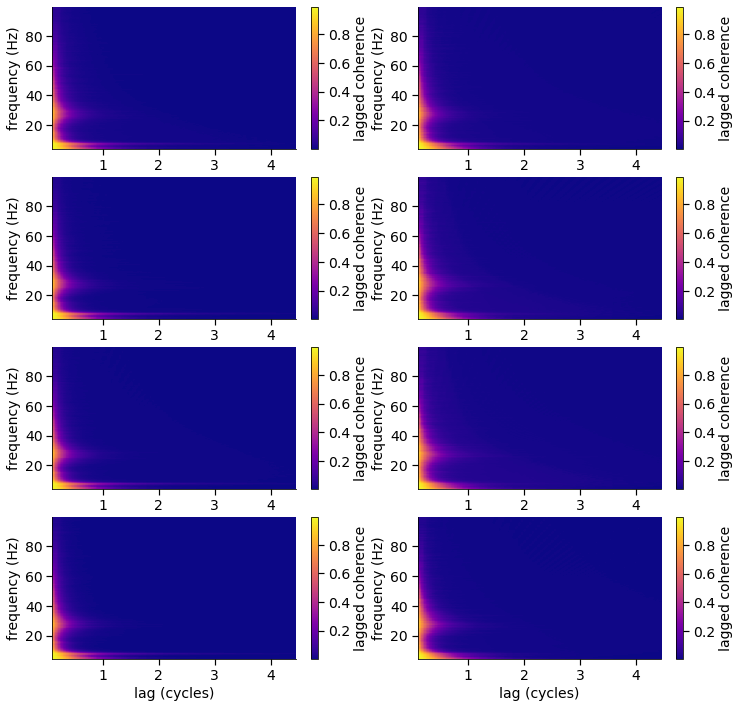

In [22]:
# Load the averaged data to see the difference between observation and execution
base_path = '/home/szhang/dev_beta_umd/data/9m'
lc_obs_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_obs_avg_all_epo_2.npy'))
lc_exe_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_exe_avg_all_epo_7.npy'))

plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Plot lc_obs_avg_all
plt.figure(figsize=(12,12))
ax=plt.subplot(4,2,1)
i1 = ax.imshow(np.mean(lc_obs_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')



# Plot lc_exe_avg_all
ax = plt.subplot(4, 2, 2)
i1 = ax.imshow(np.mean(lc_exe_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')

lc_obs_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_obs_avg_all_epo_3.npy'))
lc_exe_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_exe_avg_all_epo_8.npy'))
# Plot lc_obs_avg_all
ax=plt.subplot(4,2,3)
i1 = ax.imshow(np.mean(lc_obs_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')



# Plot lc_exe_avg_all
ax = plt.subplot(4, 2, 4)
i1 = ax.imshow(np.mean(lc_exe_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')

lc_obs_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_obs_avg_all_epo_4.npy'))
lc_exe_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_exe_avg_all_epo_9.npy'))
# Plot lc_obs_avg_all
ax=plt.subplot(4,2,5)
i1 = ax.imshow(np.mean(lc_obs_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')



# Plot lc_exe_avg_all
ax = plt.subplot(4, 2, 6)
i1 = ax.imshow(np.mean(lc_exe_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')

lc_obs_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_obs_avg_all_epo_5.npy'))
lc_exe_avg_all = np.load(os.path.join(base_path, 'average_data', 'lc_exe_avg_all_epo_10.npy'))
# Plot lc_obs_avg_all
ax=plt.subplot(4,2,7)
i1 = ax.imshow(np.mean(lc_obs_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')



# Plot lc_exe_avg_all
ax = plt.subplot(4, 2, 8)
i1 = ax.imshow(np.mean(lc_exe_avg_all, axis=0), aspect='auto', cmap='plasma',
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]],
               origin='lower')
cb = plt.colorbar(i1, label='lagged coherence')
ax.set_xlabel('lag (cycles)')
ax.set_ylabel('frequency (Hz)')